## 寻找最有参数$C$和$\gamma$

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
data3 = sio.loadmat("./exp6data/exp6data3.mat")
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [3]:
X, y = data3["X"], data3["y"]
Xval, yval = data3["Xval"], data3["yval"]

In [4]:
def plotData(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="rainbow")
    plt.xlabel("x1")
    plt.ylabel("x2")

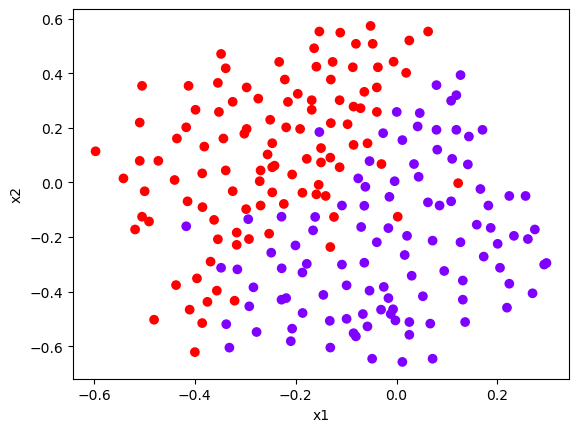

In [5]:
plotData(X, y)

In [6]:
Cs = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gammas = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [7]:
best_score = 0
best_params = (0, 0)

for C in Cs:
    for gamma in gammas:
        svc = SVC(C=C, kernel="rbf", gamma=gamma)
        svc.fit(X, y.flatten())
        score = svc.score(Xval, yval.flatten())
        if score > best_score:
            best_score = score
            best_params = (C, gamma)

print(best_score, best_params)

0.965 (0.3, 100)


In [8]:
svc_best = SVC(C=0.3, kernel="rbf", gamma=100)
svc_best.fit(X, y.flatten())

SVC(C=0.3, gamma=100)

In [9]:
X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()

(-0.596774, 0.297235, -0.657895, 0.573392)

In [10]:
def plotBoundary(model):
    x1_min, x1_max = -0.6, 0.4
    x2_min, x2_max = -0.7, 0.6
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                        np.linspace(x2_min, x2_max, 500))
    z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    zz = z.reshape(xx.shape)
    plt.contour(xx, yy, zz)

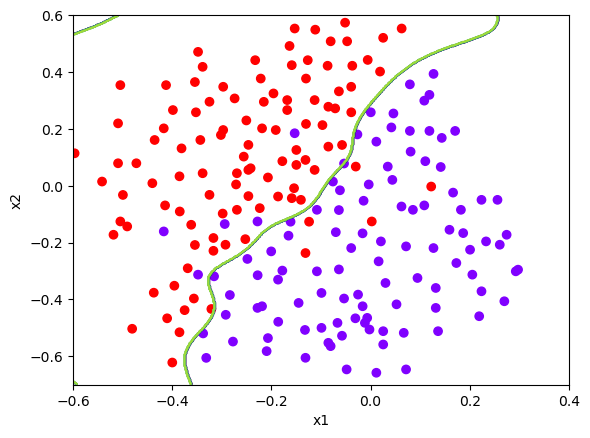

In [11]:
plotBoundary(svc_best)
plotData(X, y)